# PL02. Normalización y Estandarización del Conjunto de Datos _Pingüinos de Palmer_

__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

Para este ejercicio se volverá a emplear, al igual que en la PL01, el conjunto de datos _Pingüinos de Palmer_. Encontrará el CSV `palmer_penguins.csv` en el Campus Virtual. Este conjunto de datos contiene información sobre pingüinos de varias especies diferentes. 

En este ejercicio, teniendo en consideración los análisis del EDA de la PL01, se deberá trabajar con Scikit-Learn para normalizar y estandarizar las columnas numéricas del conjunto de datos. Probablemente sea de utilidad emplear visualizaciones de datos para observar los cambios de las transformaciones aplicadas.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Carga del conjunto de datos

In [2]:
CSV_FILE = "../sesion1/palmer_penguins.csv"

df = pd.read_csv(CSV_FILE)

## Normalización

In [3]:
# Seleccionar las columnas numéricas
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalador a las columnas numéricas una a una para no perder los valores de cada columna
df_normalizado = df.copy()
for i in range(len(numeric_columns)):
    df_normalizado[numeric_columns[i]] = scaler.fit_transform(df_normalizado[numeric_columns[i]].values.reshape(-1, 1))
# Mostrar las primeras filas del DataFrame normalizado
print(df_normalizado.head())

   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen        0.254545       0.666667           0.152542   
1   1  Adelie  Torgersen        0.269091       0.511905           0.237288   
2   2  Adelie  Torgersen        0.298182       0.583333           0.389831   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen        0.167273       0.738095           0.355932   

   body_mass_g     sex  year  
0     0.291667    male  2007  
1     0.305556  female  2007  
2     0.152778  female  2007  
3          NaN     NaN  2007  
4     0.208333  female  2007  


### Visualizacion del dataframe base

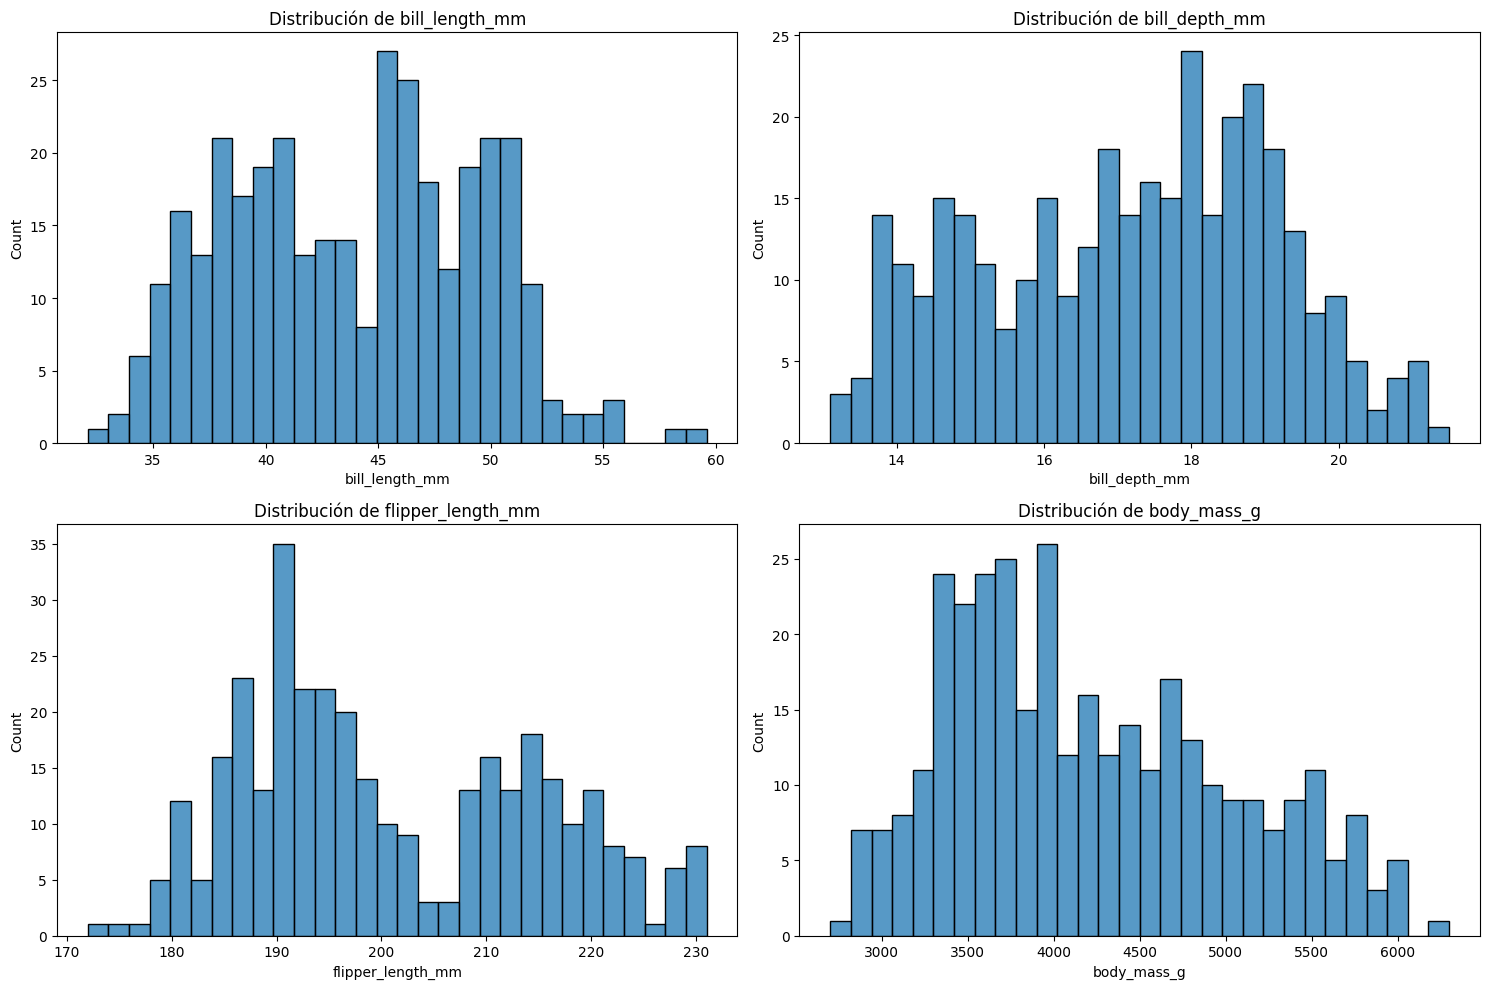

In [4]:
# Graficar las columnas numéricas del DataFrame base
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

### Visualizacion del dataframe normalizado

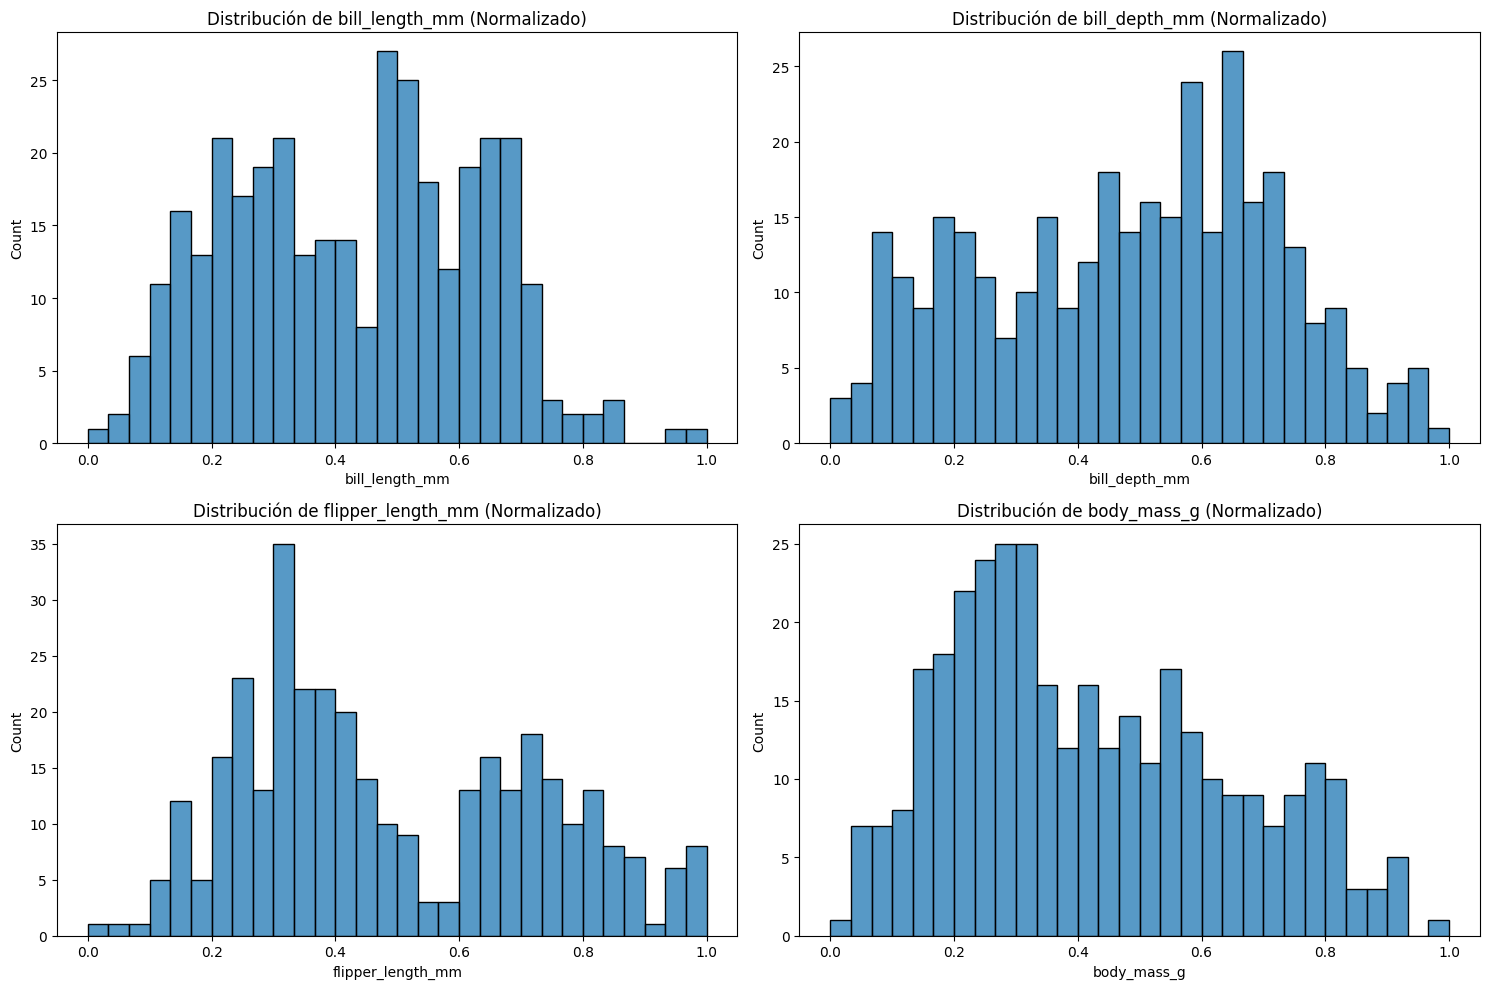

In [5]:
# Graficar las columnas numéricas del DataFrame normalizado
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(df_normalizado[column], bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {column} (Normalizado)')

plt.tight_layout()
plt.show()


### Visualizacion de diferencias entre dataFrames

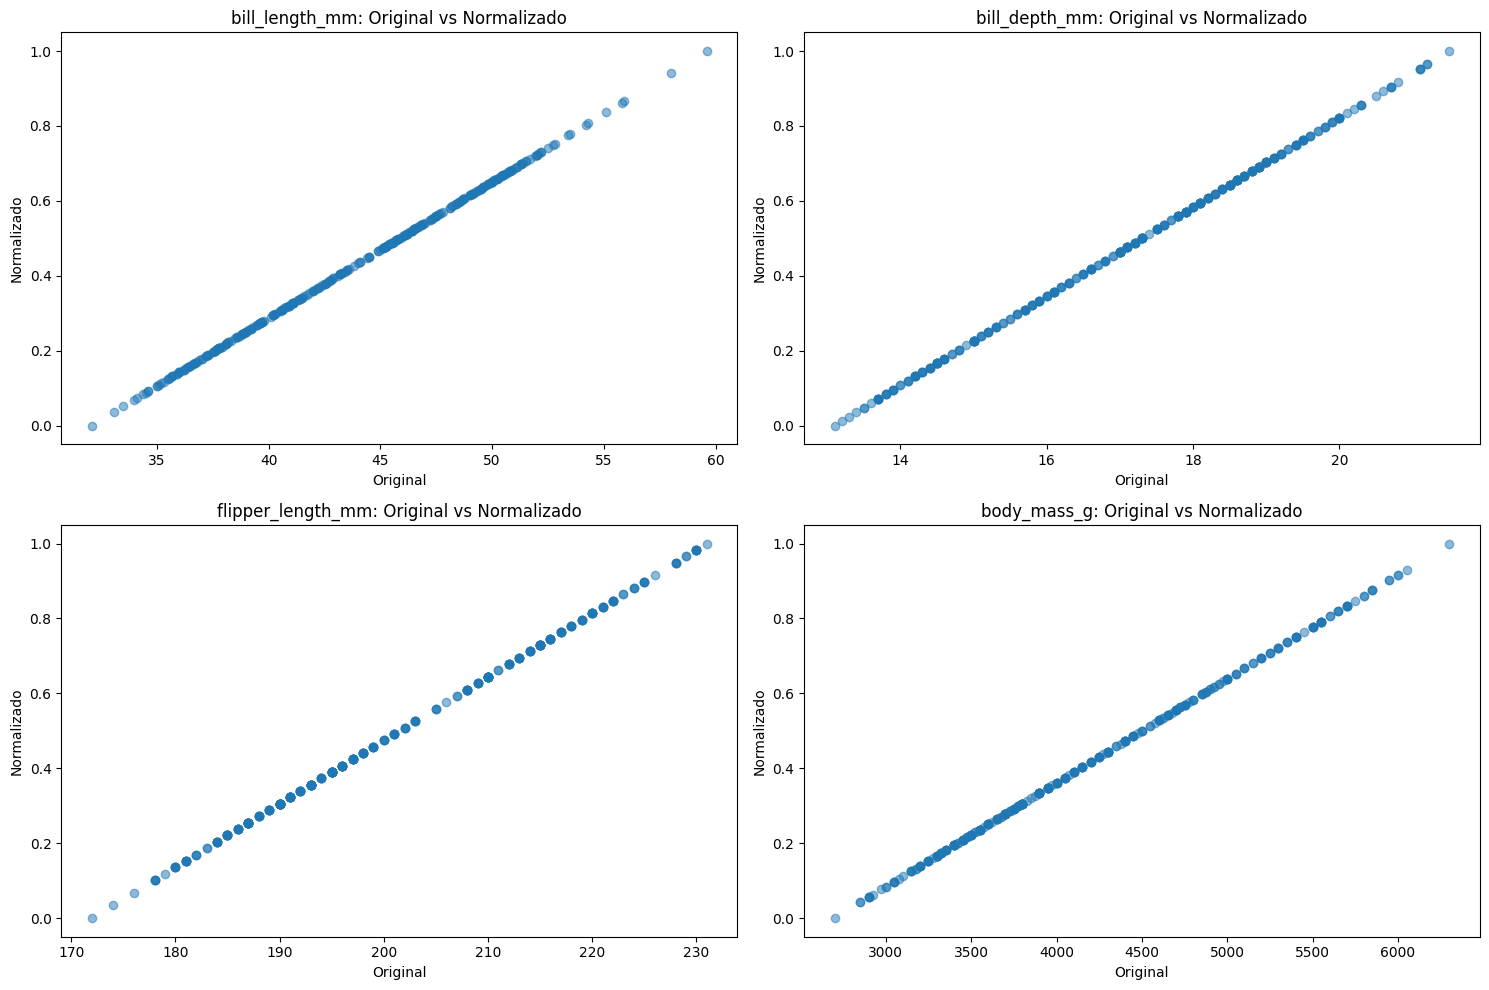

In [6]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    ax.scatter(df[column], df_normalizado[column], alpha=0.5)
    ax.set_title(f'{column}: Original vs Normalizado')
    ax.set_xlabel('Original')
    ax.set_ylabel('Normalizado')

plt.tight_layout()
plt.show()

## Estandarización

In [7]:
# Crear un objeto StandardScaler
standarizer = StandardScaler()

# Aplicar el escalador a las columnas numéricas
df_estandarizado = df.copy()
for i in range(len(numeric_columns)):
    df_estandarizado[numeric_columns[i]] = standarizer.fit_transform(df[[numeric_columns[i]]])

# Mostrar las primeras filas del DataFrame estandarizado
print(df_estandarizado.head())

   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen       -0.884499       0.785449          -1.418347   
1   1  Adelie  Torgersen       -0.811126       0.126188          -1.062250   
2   2  Adelie  Torgersen       -0.664380       0.430462          -0.421277   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen       -1.324737       1.089724          -0.563715   

   body_mass_g     sex  year  
0    -0.564142    male  2007  
1    -0.501703  female  2007  
2    -1.188532  female  2007  
3          NaN     NaN  2007  
4    -0.938776  female  2007  


### Visualizacion de la Estandarizacion

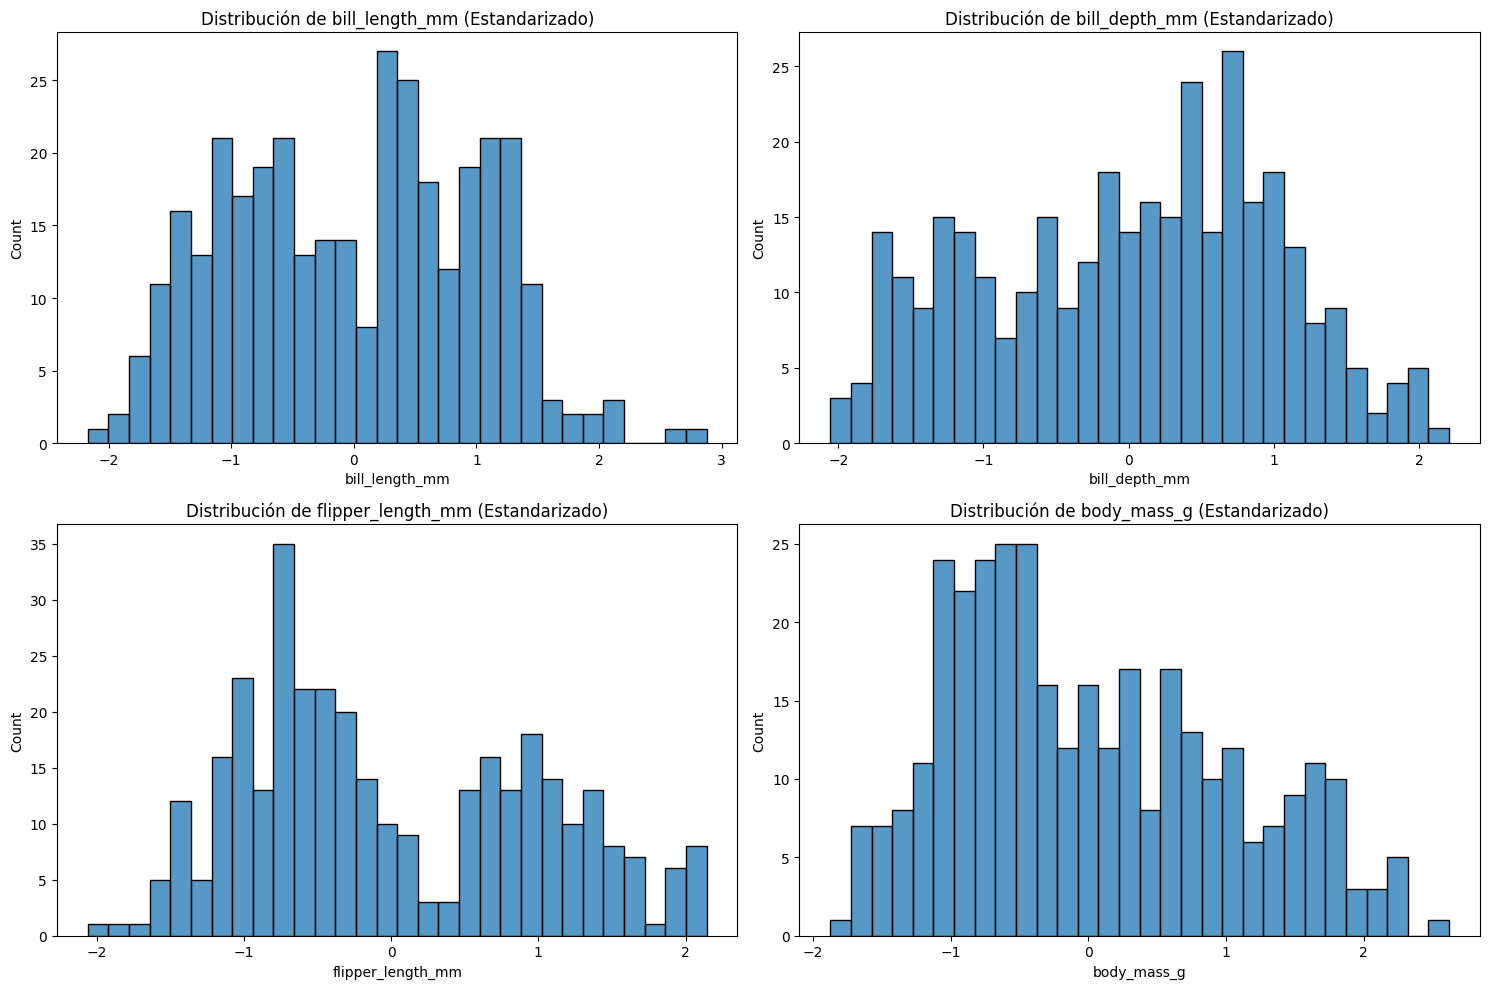

In [8]:
# Graficar las columnas numéricas del DataFrame estandarizado
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(df_estandarizado[column], bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {column} (Estandarizado)')

plt.tight_layout()
plt.show()


### Visualizacion de diferencias entre Estandarizacion y Normalizacion

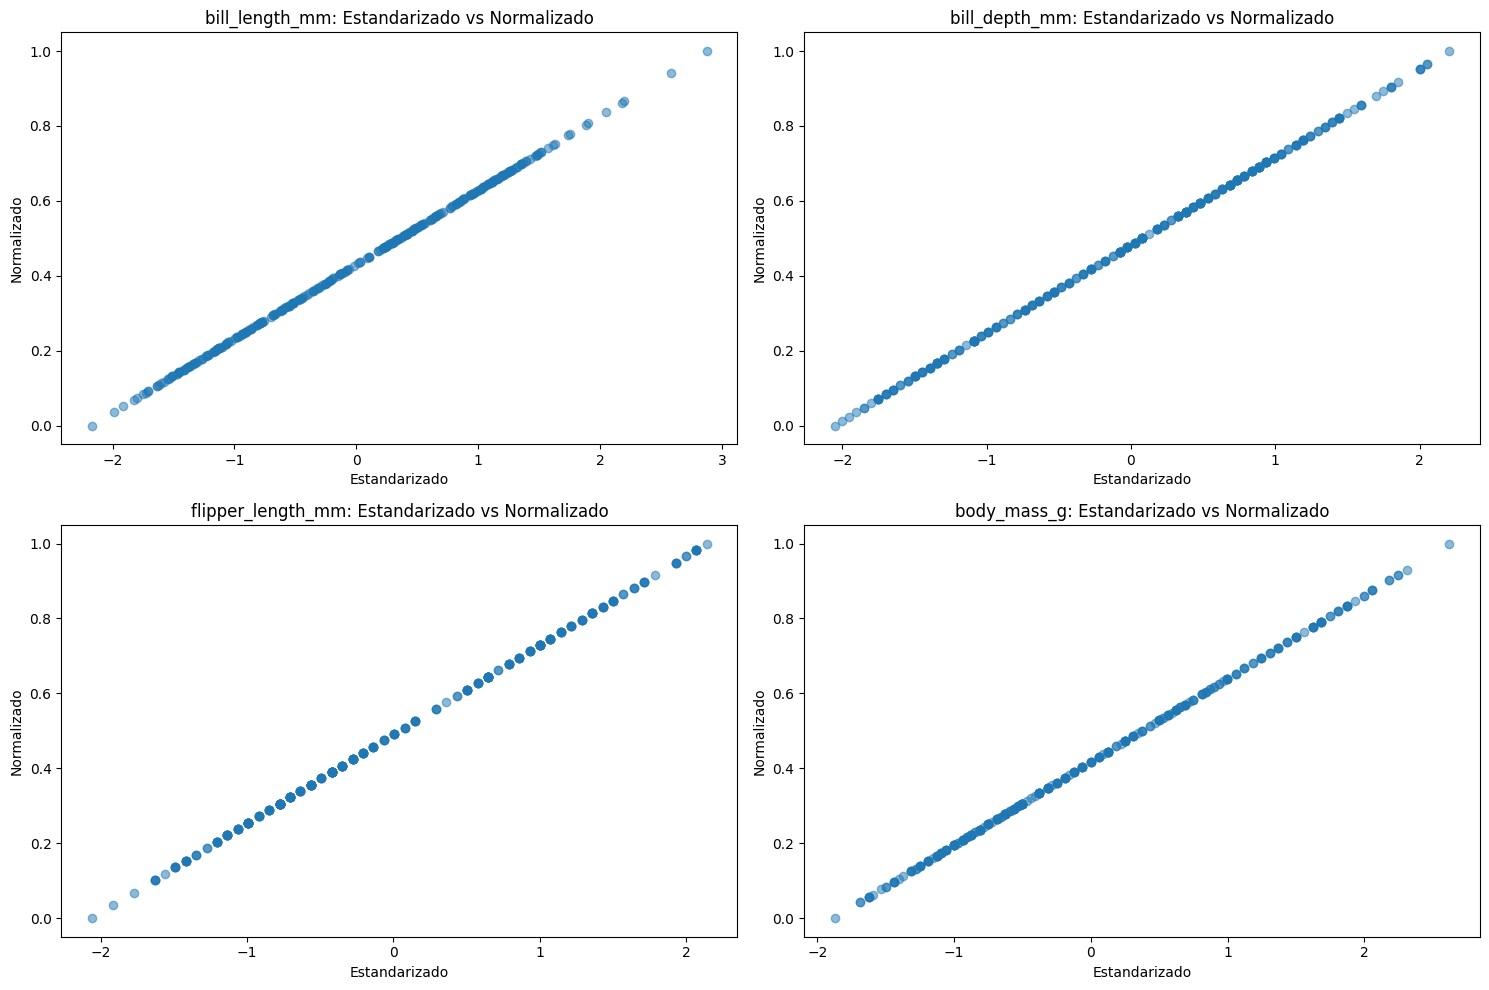

In [9]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    ax.scatter(df_estandarizado[column], df_normalizado[column], alpha=0.5)
    ax.set_title(f'{column}: Estandarizado vs Normalizado')
    ax.set_xlabel('Estandarizado')
    ax.set_ylabel('Normalizado')

plt.tight_layout()
plt.show()

## Estandarización y Normalización

In [11]:
# Obtenermos copia del dataFrame Original
df_final = df.copy()

# Generamos los modelos para editar el df
scaler = MinMaxScaler()
standarizer = StandardScaler()

# Normalizamos el df_final

for i in range(len(numeric_columns)):
    df_final[numeric_columns[i]] = scaler.fit_transform(df_final[numeric_columns[i]].values.reshape(-1, 1))
print(df_final)




      id    species     island  bill_length_mm  bill_depth_mm  \
0      0     Adelie  Torgersen        0.254545       0.666667   
1      1     Adelie  Torgersen        0.269091       0.511905   
2      2     Adelie  Torgersen        0.298182       0.583333   
3      3     Adelie  Torgersen             NaN            NaN   
4      4     Adelie  Torgersen        0.167273       0.738095   
..   ...        ...        ...             ...            ...   
339  339  Chinstrap      Dream        0.861818       0.797619   
340  340  Chinstrap      Dream        0.414545       0.595238   
341  341  Chinstrap      Dream        0.636364       0.607143   
342  342  Chinstrap      Dream        0.680000       0.702381   
343  343  Chinstrap      Dream        0.658182       0.666667   

     flipper_length_mm  body_mass_g     sex  year  
0             0.152542     0.291667    male  2007  
1             0.237288     0.305556  female  2007  
2             0.389831     0.152778  female  2007  
3          

### Visualización de df_final

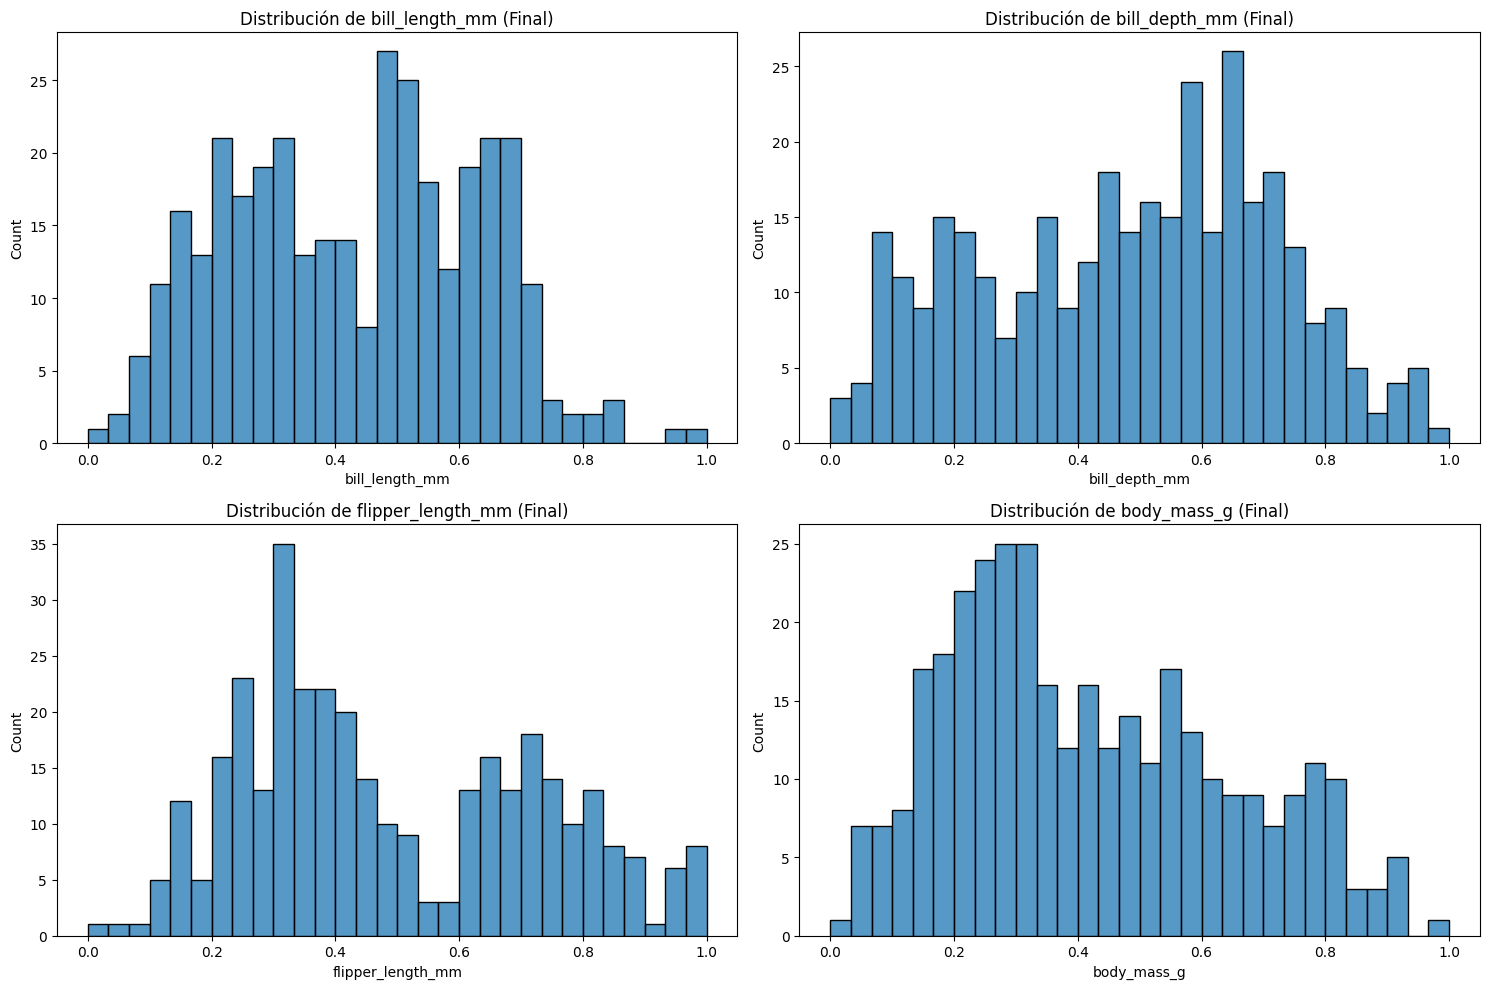

In [12]:
# Graficar las columnas numéricas del DataFrame final
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(df_final[column], bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {column} (Final)')

plt.tight_layout()
plt.show()

### Visualizacion de diferencias entre df original y final

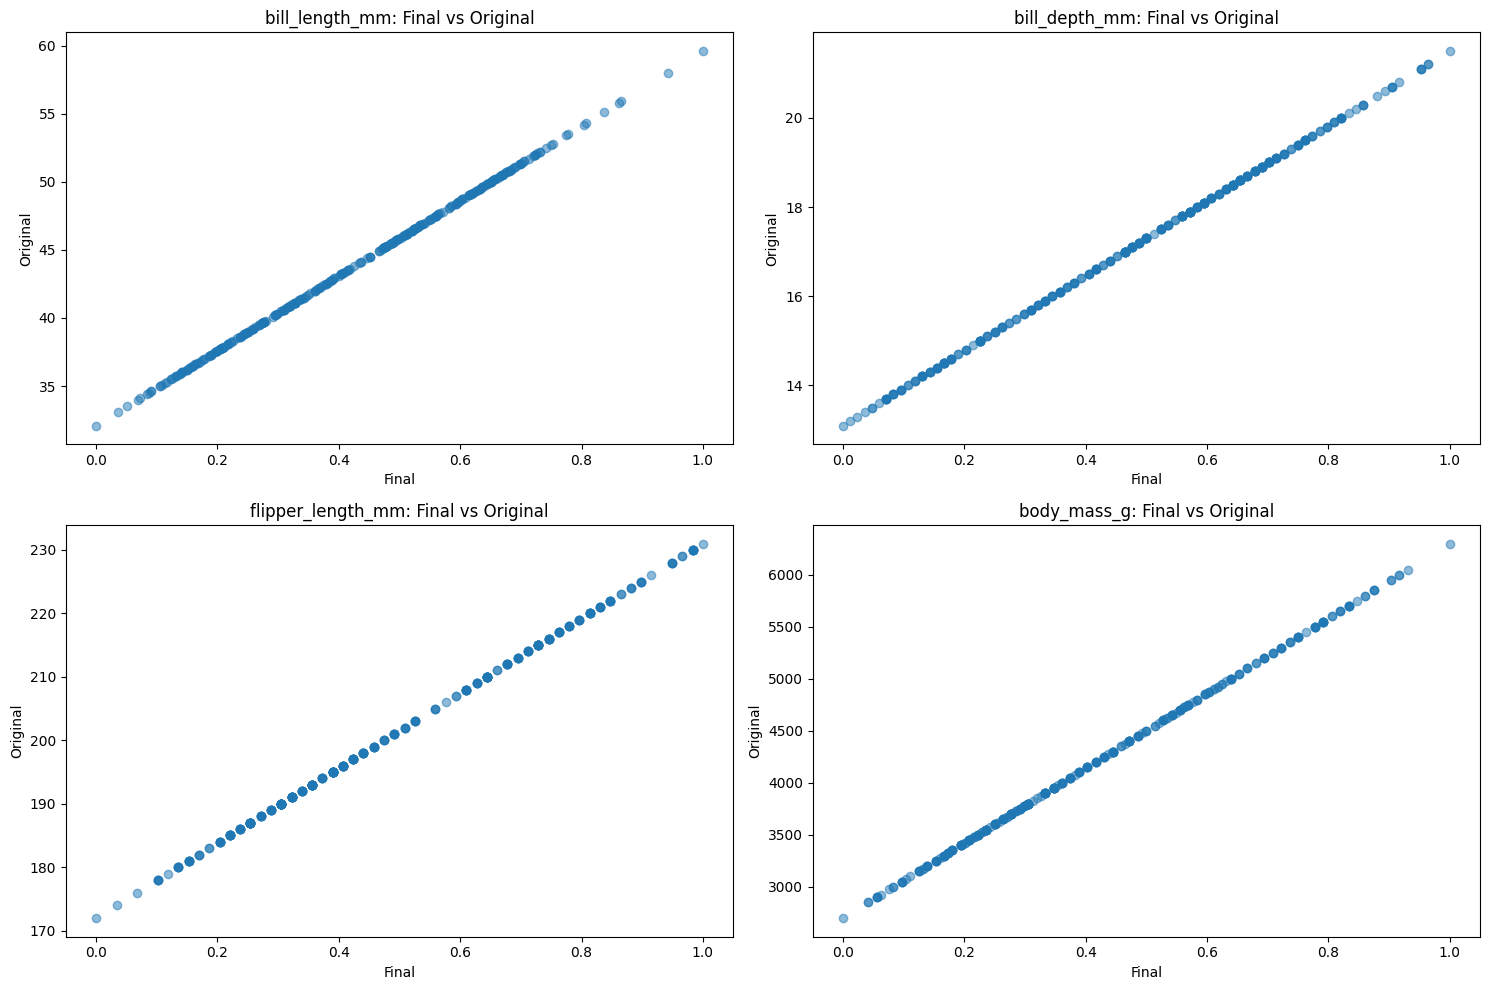

In [13]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar cada columna numérica
for i, column in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    ax.scatter(df_final[column], df[column], alpha=0.5)
    ax.set_title(f'{column}: Final vs Original')
    ax.set_xlabel('Final')
    ax.set_ylabel('Original')

plt.tight_layout()
plt.show()

## Conclusiones

En este ejercicio, hemos trabajado con el conjunto de datos _Pingüinos de Palmer_ para aplicar técnicas de normalización y estandarización utilizando Scikit-Learn. A continuación, se presentan las conclusiones obtenidas:

1. **Estandarización vs Normalización**:
   - La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es útil cuando los datos tienen diferentes unidades o escalas.
   - La normalización escala los datos para que estén en un rango específico, generalmente [0, 1]. Esto es útil cuando se desea comparar datos en una escala común.

2. **Visualización de Datos**:
   - Las visualizaciones mostraron claramente las diferencias entre los datos estandarizados y normalizados. Las distribuciones de las columnas numéricas cambiaron significativamente después de aplicar estas transformaciones.
   - Los gráficos de dispersión entre las columnas estandarizadas y normalizadas permitieron observar la relación entre ambas transformaciones.

3. **Impacto en Modelos de Aprendizaje Automático**:
   - La normalización y estandarización pueden tener un impacto significativo en el rendimiento de los modelos de aprendizaje automático. Es importante elegir la técnica adecuada según el tipo de modelo y los datos específicos.

4. **Recomendaciones**:
   - Para conjuntos de datos con diferentes unidades o escalas, se recomienda la estandarización.
   - Para algoritmos que son sensibles a la escala de los datos, como K-means o redes neuronales, la normalización puede ser más adecuada.

En resumen, tanto la normalización como la estandarización son técnicas esenciales en el preprocesamiento de datos y su correcta aplicación puede mejorar significativamente el rendimiento de los modelos de aprendizaje automático.

